In [53]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
def pprint(soup):
    if str(type(soup)) == "<class 'bs4.element.ResultSet'>":
        print(len(soup))
        for i in soup:
            # i=i.get('title')
            # print(i)
            print(i.prettify())
    elif str(type(soup)) in ["<class 'bs4.element.Tag'>","<class 'bs4.BeautifulSoup'>",]:
        print(soup.prettify())
    else:
        print([str(type(soup))])

    # print(soup)
pd.set_option('display.max_colwidth', None)
URL = 'https://www.dotabuff.com'
URL_trends = URL+'/heroes/trends'
page = requests.get(URL_trends, headers = {'User-agent': 'use_voice_communication_please research'})

soup = BeautifulSoup(page.content, "html.parser")
t = soup.prettify().split('\n')
for i in range(10):
    print(t[i])

<!DOCTYPE html>
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Heroes - Trends - DOTABUFF - Dota 2 Stats
  </title>
  <link href="/assets/application-76bf1668b74b95c4288fe40d1a58f54926c8384f2f74a3a0d24824204cc5dfcd.css" media="all" rel="stylesheet"/>
  <link href="https://www.dotabuff.com/blog.rss" rel="alternate" title="RSS" type="application/rss+xml"/>
  <script src="/assets/application-6d204d61719e0a05a44c6ba4ba74219193f0181b57941d2b3cefdc04f7abd2ba.js">


In [84]:
# with open("./db_trends.html") as fp:
#     soup = BeautifulSoup(fp, 'html.parser')
# t = soup.prettify().split('\n')
# for i in range(10):
#     print(t[i])

In [89]:
table = soup.find('article')
tb = table.find('tbody')
df_trends = []
for i in tb.find_all('tr'):
    row = []
    t = i.find('a',attrs={'class':re.compile('link-type-hero')})
    row.append(t.get('href'))
    for j in i.find_all('td'):
        row.append(j.get('data-value'))
    df_trends.append(row)
    # pprint(i)
    # break
df_trends = pd.DataFrame(df_trends)

rename_cols = 'link,name,wr_prev,wr,d_wr,skip,pr_prev,pr,d_pr,skip'
rename_cols = rename_cols.split(',')
rename_cols = {i:j for i,j in enumerate(rename_cols)}
rename_cols
df_trends = df_trends.rename(columns=rename_cols)
filter = [i for i in rename_cols.values() if i != 'skip']
df_trends = df_trends[filter]
df_trends['link'] = URL+df_trends['link']



df_trends['id'] = df_trends['link'].str.split('/').str[6]
df_trends

,link,name,wr_prev,wr,d_wr,pr_prev,pr,d_pr,id
0,https://www.dotabuff.com/heroes/trends/heroes/witch-doctor,Witch Doctor,50.6451,58.7045,8.059400000000004,17.7247,21.6122,3.887500000000003,witch-doctor
1,https://www.dotabuff.com/heroes/trends/heroes/invoker,Invoker,48.4558,54.7933,6.337499999999999,13.3074,18.8661,5.5587,invoker
2,https://www.dotabuff.com/heroes/trends/heroes/sand-king,Sand King,52.3797,57.9785,5.598799999999997,6.1479,10.4297,4.2818000000000005,sand-king
3,https://www.dotabuff.com/heroes/trends/heroes/phantom-assassin,Phantom Assassin,47.3567,52.607,5.250300000000003,15.639,21.086,5.446999999999999,phantom-assassin
4,https://www.dotabuff.com/heroes/trends/heroes/riki,Riki,52.1508,57.2192,5.068400000000004,6.0059,10.1955,4.1895999999999995,riki
...,...,...,...,...,...,...,...,...,...
119,https://www.dotabuff.com/heroes/trends/heroes/tinker,Tinker,52.2448,48.5361,-3.7087000000000003,9.0646,8.0839,-0.9807000000000006,tinker
120,https://www.dotabuff.com/heroes/trends/heroes/arc-warden,Arc Warden,51.7331,47.7472,-3.985900000000001,3.7556,2.7754,-0.9802,arc-warden
121,https://www.dotabuff.com/heroes/trends/heroes/omniknight,Omniknight,52.3166,48.1955,-4.121099999999998,5.4594,3.6743,-1.7850999999999995,omniknight
122,https://www.dotabuff.com/heroes/trends/heroes/spirit-breaker,Spirit Breaker,51.1353,46.9862,-4.149100000000004,19.5813,15.9848,-3.596499999999999,spirit-breaker


In [178]:
def i_counter(id):
    i_URL_counter = f'https://www.dotabuff.com/heroes/{id}/counters?date=week'
    # i_URL_counter = f'https://www.dotabuff.com/heroes/{id}/counters'
    # print(i_URL_counter)
    i_page_counter = requests.get(i_URL_counter, headers = {'User-agent': 'use_voice_communication_please research'})
    i_soup_counter = BeautifulSoup(i_page_counter.content, "html.parser")
    for matchup  in i_soup_counter.find_all('section'):
        try:
            if matchup.find('header').text == 'Matchups':
                break
        except:
            pass
    table = matchup.find('article')
    tb = table.find('tbody') 
    # pprint(tb)
    df_counter = []
    for i in tb.find_all('tr'):
        row = []
        t = i.find('a',attrs={'class':re.compile('link-type-hero')})
        row.append(t.get('href'))
        for j in i.find_all('td'):
            row.append(j.get('data-value'))
        df_counter.append(row)
        # print(row)
        # pprint(t)
        # pprint(i)
        # break
    df_counter = pd.DataFrame(df_counter[::])
    rename_cols = 'link,name,skip,disadvantage,wr_0,n_matches'
    rename_cols = rename_cols.split(',')
    rename_cols = {i:j for i,j in enumerate(rename_cols)}
    # rename_cols
    df_counter = df_counter.rename(columns=rename_cols)
    filter = [i for i in rename_cols.values() if i != 'skip']
    df_counter = df_counter[filter]
    df_counter['id_1'] = df_counter['link'].str.split('/').str[2]
    df_counter['id_0'] = id
    filter = ['id_0', 'id_1', 'wr_0', 'disadvantage', 'n_matches', ]
    df_counter = df_counter[filter]
    return df_counter
    
df_counters = []
for i,row in df_trends.iterrows():
    id = row["id"]
    # print(id)
    df_i = i_counter(id)
    # display(df_i)
    try:
        df_counters = pd.concat([df_counters,df_i])
        # break
    except Exception as e:
        # print(e)
        df_counters = df_i.copy(deep=True)
    # break
for i in ['wr_0','disadvantage','n_matches']:
    df_counters[i] = pd.to_numeric(df_counters[i])
display(df_counters)
# i_counter('witch-doctor')

,id_0,id_1,wr_0,disadvantage,n_matches
0,witch-doctor,broodmother,57.7860,4.4733,5086
1,witch-doctor,morphling,58.5131,3.2787,19235
2,witch-doctor,rubick,57.6440,2.7051,59831
3,witch-doctor,medusa,54.1492,2.4213,20148
4,witch-doctor,faceless-void,53.5906,2.2736,44435
...,...,...,...,...,...
118,meepo,arc-warden,58.8183,-4.7991,3402
119,meepo,storm-spirit,59.5876,-4.8151,5481
120,meepo,faceless-void,58.7844,-5.6651,9494
121,meepo,phantom-lancer,55.1998,-6.1371,5779


In [204]:
df_counters[['wr_0']].describe()
# for i in range(35,66,5):
#     print(i)

,wr_0
count,15252.000000
mean,49.999950
std,4.146401
min,35.433600
25%,47.183825
50%,50.000000
75%,52.816075
max,64.566300


In [234]:
df_exp1 = []
for i in range(35,66):
    # print(i)
    # print(i)
    filter = df_counters['wr_0'] >= i
    df_t = df_counters[filter]
    df_t = df_t.groupby(['id_0']).count()
    df_t = df_t.reset_index()
    # i=f'{i}'
    df_t[i] = df_t['id_1']
    df_t = df_t[['id_0',i]]
    try:
        df_exp1 = pd.merge(df_exp1,df_t,on='id_0',how='left')
    except Exception as e:
        # print(e)
        df_exp1 = df_t.copy(deep=True)
# df_t['id_0'] = df_t.index
# df_t.sort_values(by='50')
df_exp1 = df_exp1.fillna(0)
df_exp1

,id_0,35,36,37,38,39,40,41,42,43,...,56,57,58,59,60,61,62,63,64,65
0,abaddon,123,123,123,123,123,123,123,123,121,...,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,alchemist,123,123,123,123,123,123,120,114,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ancient-apparition,123,123,123,123,123,123,123,123,123,...,29.0,18.0,11.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0
3,anti-mage,123,123,123,122,122,122,120,119,119,...,4.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,arc-warden,123,123,123,123,123,123,122,121,118,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,windranger,123,123,123,123,123,123,123,123,121,...,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,winter-wyvern,123,123,123,123,122,122,122,121,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,witch-doctor,123,123,123,123,123,123,123,123,123,...,44.0,32.0,18.0,10.0,3.0,2.0,1.0,0.0,0.0,0.0
122,wraith-king,123,123,123,123,123,123,123,123,123,...,37.0,24.0,13.0,6.0,3.0,2.0,1.0,0.0,0.0,0.0


46.0 0
31
49 -4
31
50.0 3
31
57.0 -1
31
47.0 -1
31
50.0 3
31
46.0 -1
31
50 -7
31
54 -3
31
48.0 1
31
60 -3
31
55.0 1
31
58.0 -1
31
47 -6
31
45.0 0
31
55.0 3
31
53 -2
31
53.0 2
31
61 -2
31
49.0 0
31
57.0 3
31
61.0 -1
31
60.0 1
31
56 -2
31
52 -2
31
61.0 -1
31
62 -8
31
43 -2
31
57.0 0
31
54.0 -1
31
60.0 1
31
56.0 2
31
59 -3
31
47 -5
31
44 -2
31
54.0 -1
31
57.0 0
31
59.0 -1
31
51 -2
31
62.0 -1
31
56.0 1
31
52.0 0
31
50.0 4
31
59.0 0
31
54 -5
31
59.0 0
31
48.0 4
31
52.0 -1
31
58.0 2
31
52.0 -1
31
54 -4
31
58 -3
31
47.0 -1
31
60 -3
31
61.0 0
31
62 -6
31
54 -4
31
47 -4
31
62 -2
31
60.0 2
31
59.0 -1
31
62 -5
31
58 -6
31
62.0 1
31
56.0 4
31
54 -4
31
57.0 3
31
54.0 1
31
47.0 1
31
48.0 0
31
55.0 1
31
47.0 3
31
39.0 2
31
46 -4
31
58.0 0
31
62.0 3
31
45.0 -1
31
57.0 -1
31
53 -3
31
59.0 -1
31
50 -2
31
62.0 -1
31
54.0 -1
31
60.0 5
31
52 -5
31
57.0 6
31
49 -2
31
58.0 0
31
60.0 1
31
56.0 3
31
52.0 2
31
58.0 2
31
57.0 0
31
47 -4
31
53.0 0
31
62.0 2
31
55.0 -1
31
59 -3
31
49.0 1
31
50 -2
31
52 -4
31
53 -4

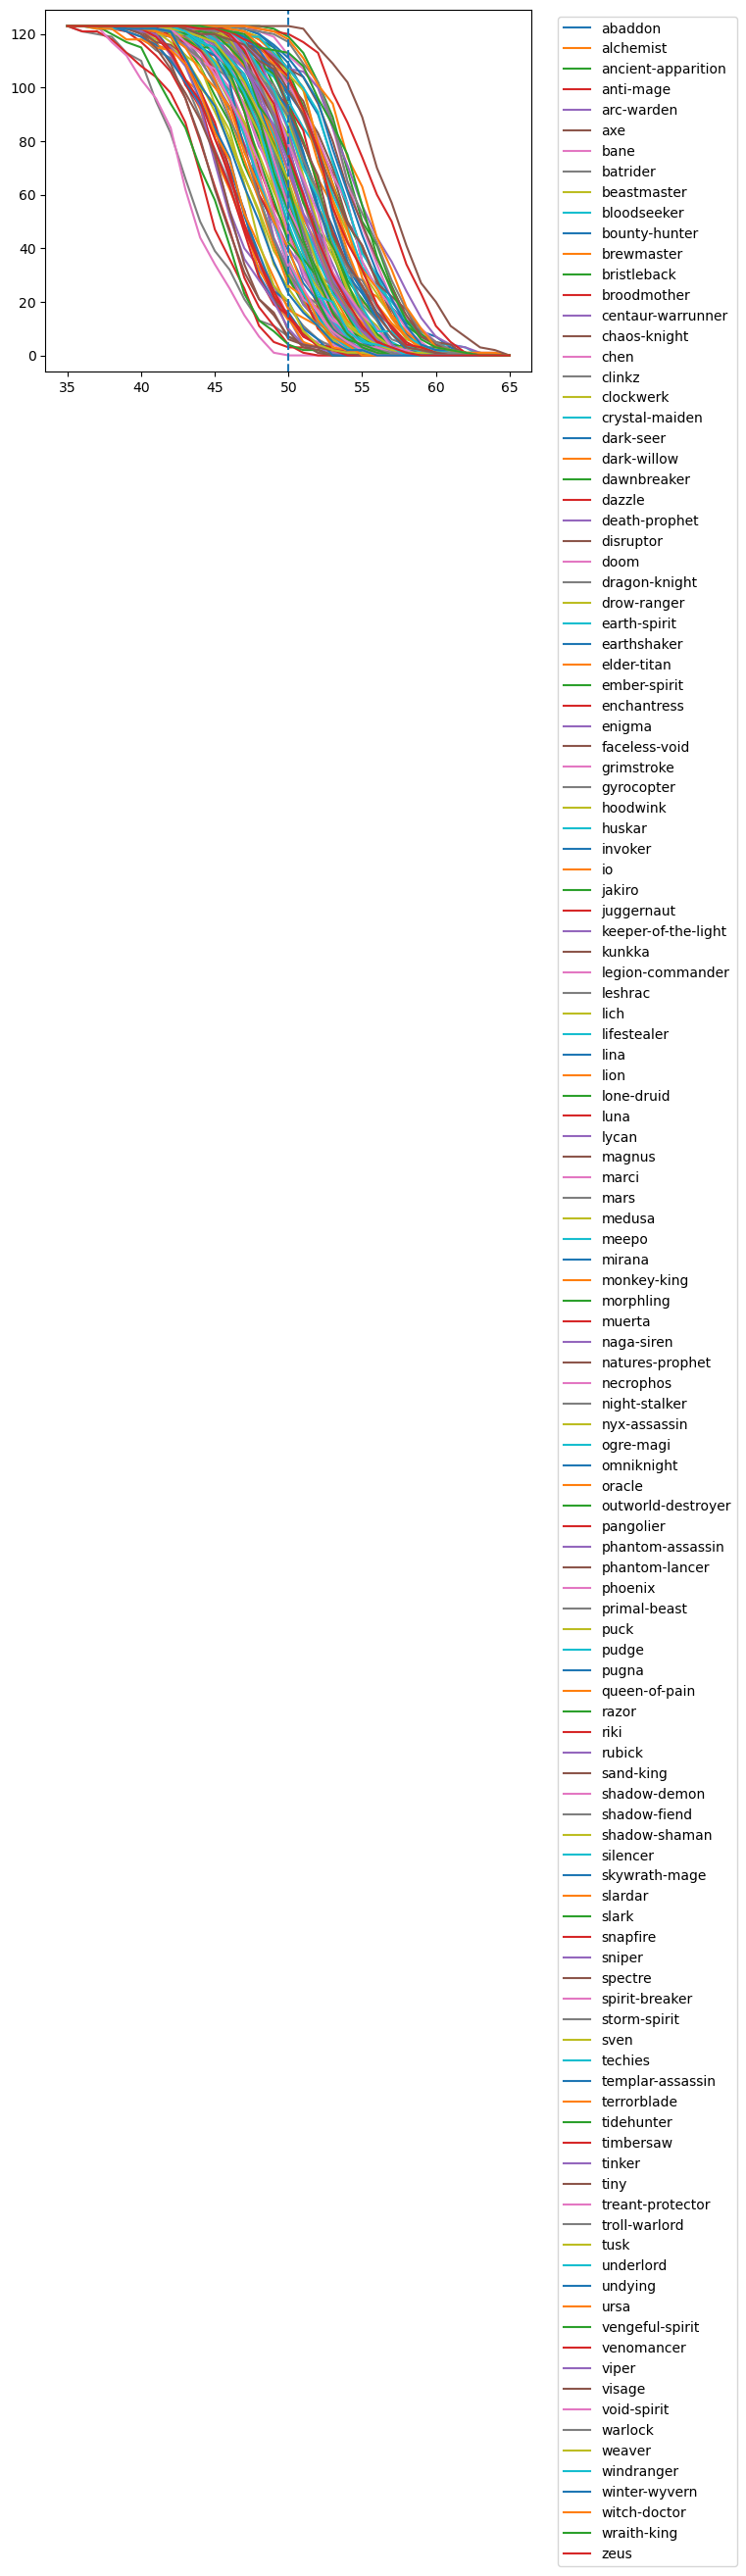

In [262]:
import numpy as np
import matplotlib.pyplot as plt

at = 50

df_exp2 = df_exp1.copy(deep=True)

# filter = df_exp2[at]>122
# df_exp2 = df_exp2[filter]

for i, row in df_exp2.iterrows():
    filter = [j for j in row.index if j != 'id_0']    
    y = row[filter].tolist()
    for k,j in enumerate(y):
        if j > 124/2:
            pass
        else:
            break
    print(j,k-16)
    x = [float(j) for j in filter]
    plt.plot(x,y,label = row['id_0'])
    print(len(x))
    # break



# interest_rates = [.12, .15, .2]
# years = 10
# amount = np.empty(years + 1)
# for i in interest_rates:
#     amount[0] = 100
#     for year in range(years):
#         amount[year + 1] = amount[year]*(1 + i)
#     plt.plot(amount, label = f'$\\alpha = {i}$')
plt.axvline(at, linestyle='--')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()
    

In [81]:
df_trends.sort_values(by='wr',ascending=False)

,link,name,wr_prev,wr,d_wr,pr_prev,pr,d_pr
0,/heroes/witch-doctor,Witch Doctor,50.6451,58.7045,8.059400000000004,17.7247,21.6122,3.887500000000003
2,/heroes/sand-king,Sand King,52.3797,57.9785,5.598799999999997,6.1479,10.4297,4.2818000000000005
4,/heroes/riki,Riki,52.1508,57.2192,5.068400000000004,6.0059,10.1955,4.1895999999999995
10,/heroes/warlock,Warlock,52.5818,56.0115,3.429699999999997,5.1469,8.6907,3.5438
1,/heroes/invoker,Invoker,48.4558,54.7933,6.337499999999999,13.3074,18.8661,5.5587
...,...,...,...,...,...,...,...,...
60,/heroes/enchantress,Enchantress,44.8943,44.4531,-0.44120000000000203,4.5307,3.2303,-1.3004000000000002
77,/heroes/morphling,Morphling,44.6939,43.5779,-1.1159999999999997,6.7414,4.9399,-1.8014999999999999
110,/heroes/timbersaw,Timbersaw,46.3784,43.5571,-2.821300000000001,7.9082,5.4125,-2.4957000000000003
62,/heroes/batrider,Batrider,43.2432,42.6783,-0.5649000000000015,2.0897,1.3411,-0.7486000000000002


In [21]:
!ls

1.jpeg	3.jpeg	5.jpeg	7.jpeg		 db_trends.html
2.jpeg	4.jpeg	6.jpeg	db_trends_files  dotabuff.ipynb
